In [1]:
%pwd


'D:\\Data\\PROG\\tensorflow'

In [2]:
import os
import zipfile

local_zip = 'D://Data/PROG/tensorflow/files/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('D://Data/PROG/tensorflow/files/')
zip_ref.close()

local_zip = 'D://Data/PROG/tensorflow/files/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('D://Data/PROG/tensorflow/files/')
zip_ref.close()

In [3]:
rock_dir = os.path.join('D://Data/PROG/tensorflow/files/rps/rock')
paper_dir = os.path.join('D://Data/PROG/tensorflow/files/rps/paper')
scissors_dir = os.path.join('D://Data/PROG/tensorflow/files/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [5]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14107391096753209137,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4930941747
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10580881027112570103
 physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [6]:
training_dir= "D://Data/PROG/tensorflow/files/rps/" #geberator for training images

training_datagen =ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,width_shift_range=0.2,
                                    height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                                    horizontal_flip=True,fill_mode='nearest')

In [7]:
validation_dir='D://Data/PROG/tensorflow/files/rps-test-set/' #generator for validation images
validation_datagen =ImageDataGenerator(rescale=1./255)



In [8]:
train_generator=training_datagen.flow_from_directory(training_dir,target_size=(150,150),class_mode='categorical',batch_size=126)
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),class_mode='categorical',batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)), #first convolution
    tf.keras.layers.MaxPooling2D(2,2),                                           #first pooling
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),                           #second convolution
    tf.keras.layers.MaxPooling2D(2,2),                                            #second pooling
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),                         #third convolution
    tf.keras.layers.MaxPooling2D(2,2),                                              #third pooling
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),                             #fourth convolution    
    tf.keras.layers.MaxPooling2D(2,2),                                              #fourth pooling
    
    tf.keras.layers.Flatten(),                                                       #flattening reults  to pass into DNN
    tf.keras.layers.Dropout(0.5),                                                   #adding  dropout to DNN
    
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [11]:
history=model.fit(train_generator,epochs=25,steps_per_epoch=20,validation_data=validation_generator,verbose=1,validation_steps=3)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/25
20/20 [==============================] - 24s 1s/step - loss: 1.2184 - accuracy: 0.3520 - val_loss: 1.0720 - val_accuracy: 0.5430
Epoch 2/25
20/20 [==============================] - 19s 934ms/step - loss: 1.0899 - accuracy: 0.4179 - val_loss: 2.4768 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 19s 933ms/step - loss: 1.1237 - accuracy: 0.4492 - val_loss: 0.8618 - val_accuracy: 0.5134
Epoch 4/25
20/20 [==============================] - 19s 932ms/step - loss: 0.9335 - accuracy: 0.5659 - val_loss: 0.9979 - val_accuracy: 0.3441
Epoch 5/25
20/20 [==============================] - 19s 932ms/step - loss: 0.8235 - accuracy: 0.6115 - val_loss: 0.8063 - val_accuracy: 0.6102
Epoch 6/25
20/20 [==============================] - 19s 931ms/step - loss: 0.7661 - accuracy: 0.6579 - val_loss: 0.3833 - val_accuracy: 0.8763
Epoch 7/25
20/20 [==============================] - 19

**The validation accuracy is quite high from 7th epoch because the data was super-generalized. The dataset was taken from a tutorial by  Laurence Moroney, AI advocate@ Google. The dataset has images that were too easy to learn.Might also be an indication for overfit**

Testing my own image

In [18]:
import numpy as np    # converting image nito array because generator takes arrays as inputs

path="files/mytest/paper.jpg"
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print(classes)
print(path)

[[1. 0. 0.]]
files/mytest/paper.jpg


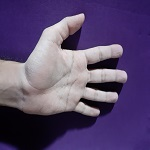

In [22]:
from IPython.display import Image as im
im("files/mytest/paper.jpg")